# Question 5: Changes year to year

This notebook aims to answer the fifth question of the project.

Year to year:

- Has there been an overall increase or reduction in crime?

- ~~What has been the change in crime per neighbourhood?~~

- Has a certain type of offence seen a significant decrease or increase?

In [1]:
# Dependencies

from pathlib import Path 
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Read in data
# df = pd.read_csv(Path('resources', 'mci_no_duplicates_2018_20_22.csv'))

# read all data instead
df = pd.read_csv(Path('..', 'resources', 'mci_no_duplicates_2014_and_over.csv'))

# Keep only the relevant columns, rename them and drop na
df = (df[['NEIGHBOURHOOD_158', 'HOOD_158', 'OCC_YEAR', 'LOCATION_TYPE', 'PREMISES_TYPE', 'OFFENCE', 'MCI_CATEGORY']]
    .rename(
        columns={
            'NEIGHBOURHOOD_158': 'Nh Name',
            'HOOD_158': 'Nh Code',
            'OCC_YEAR': 'Year',
            'LOCATION_TYPE': 'Location Type',
            'PREMISES_TYPE': 'Premises Type',
            'MCI_CATEGORY': 'Category',
            'OFFENCE': 'Offence',
        }
    )
)


# Make year a string 
df['Year'] = (df['Year']
    .astype('string')
    .str.replace('.0', '',regex=False)
)

df.head()

,Nh Name,Nh Code,Year,Location Type,Premises Type,Offence,Category
0,South Riverdale,70,2014,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,B&E,Break and Enter
1,North St.James Town,74,2014,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault
2,NSA,NSA,2014,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Over,Theft Over
3,Blake-Jones,69,2014,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault
4,Wellington Place,164,2014,Bar / Restaurant,Commercial,Assault Bodily Harm,Assault


## By year

In [3]:
# general counts by year
df_by_year = (df
    .groupby('Year', as_index=False)
    .size()
    .rename(columns={'size': 'Number of events'})
)
df_by_year

,Year,Number of events
0,2014,30202
1,2015,30641
2,2016,31157
3,2017,32790
4,2018,34772
5,2019,37114
6,2020,32456
7,2021,32114
8,2022,37226


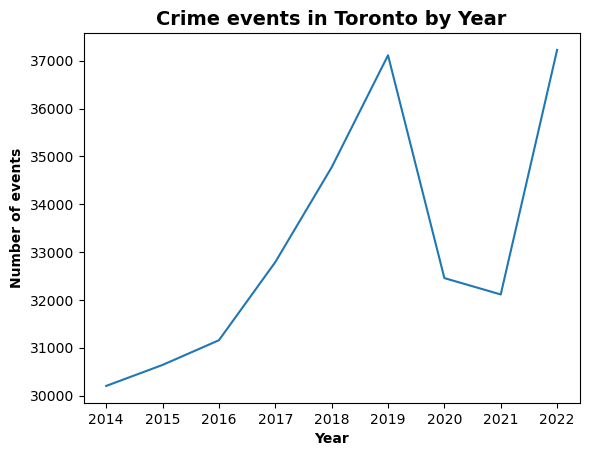

In [4]:
fig, ax = plt.subplots()

ax.plot(
    df_by_year['Year'],
    df_by_year['Number of events']
)

plt.xlabel('Year', fontdict={'weight': 700})
plt.ylabel('Number of events', fontdict={'weight': 700})
plt.title(
    'Crime events in Toronto by Year',
    fontdict={'weight': 700, 'size': 14}
)

plt.show()

In [5]:
# count by category and year
year_category_count = (df
    .groupby(['Year', 'Category'], as_index=False)
    .size()
    .rename(columns={'size': 'Number of events'})
)
year_category_count.head(10)

,Year,Category,Number of events
0,2014,Assault,15294
1,2014,Auto Theft,3485
2,2014,Break and Enter,7216
3,2014,Robbery,3193
4,2014,Theft Over,1014
5,2015,Assault,16547
6,2015,Auto Theft,3090
7,2015,Break and Enter,6934
8,2015,Robbery,3028
9,2015,Theft Over,1042


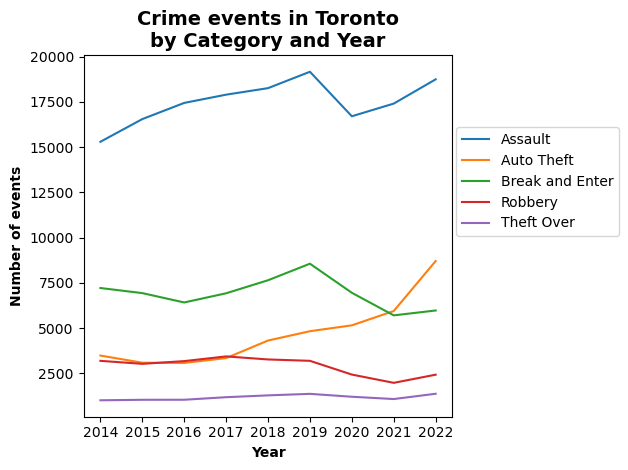

In [6]:
# Visualize
# List ofcategories
mci_cats = list(year_category_count['Category'].unique())

fig, ax = plt.subplots()

for mci_cat in mci_cats:
    this_data = year_category_count.loc[year_category_count['Category'] == mci_cat]
    # add this category to plot
    ax.plot(
        this_data['Year'],
        this_data['Number of events'],
        label=mci_cat,
        clip_on = False
    )

plt.xlabel('Year', fontdict={'weight': 700})
plt.ylabel('Number of events', fontdict={'weight': 700})
plt.title(
    'Crime events in Toronto\nby Category and Year',
    fontdict={'weight': 700, 'size': 14}
    )
plt.legend(loc=(1.01, 0.5))
# year_category_count.plot(
#     kind='bar',
#     stacked=False
# )
plt.tight_layout()
plt.show()

In [7]:
year_offence_count = (df
    .groupby(['Year', 'Category', 'Offence'], as_index=False)
    .size()
    .fillna(0)
    .rename(columns={'size': 'Number of events'})
)

year_offence_count

,Year,Category,Offence,Number of events
0,2014,Assault,Administering Noxious Thing,29
1,2014,Assault,Aggravated Aslt Peace Officer,1
2,2014,Assault,Aggravated Assault,262
3,2014,Assault,Aggravated Assault Avails Pros,3
4,2014,Assault,Air Gun Or Pistol: Bodily Harm,1
...,...,...,...,...
405,2022,Theft Over,Theft Of Utilities Over,1
406,2022,Theft Over,Theft Over,740
407,2022,Theft Over,Theft Over - Bicycle,18
408,2022,Theft Over,Theft Over - Distraction,13


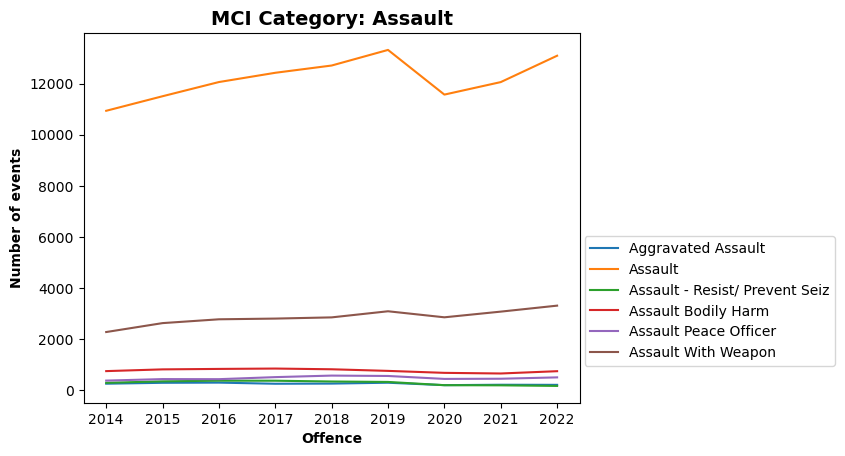

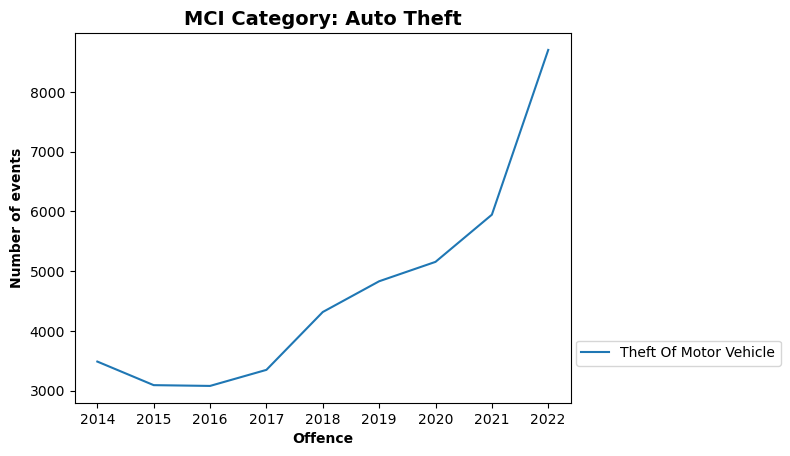

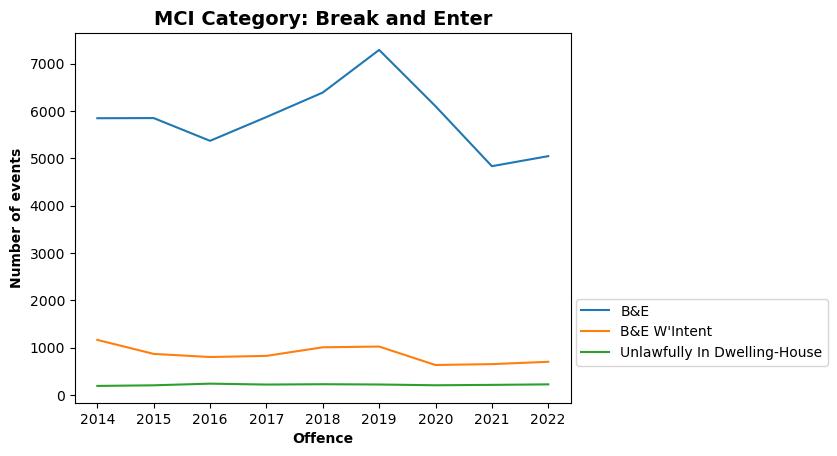

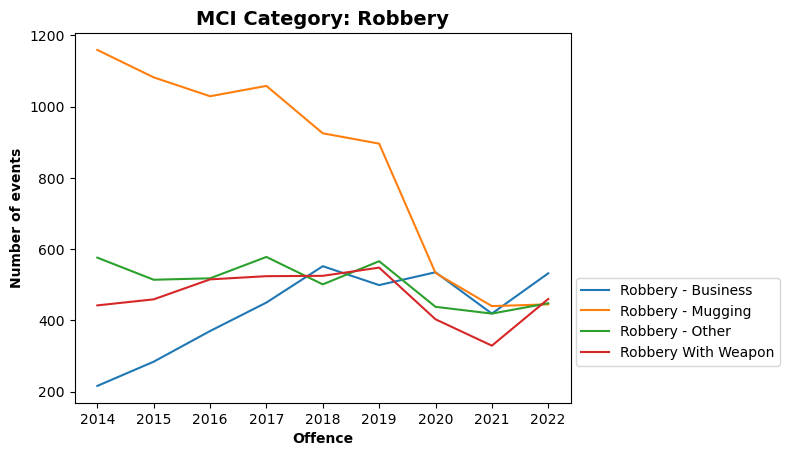

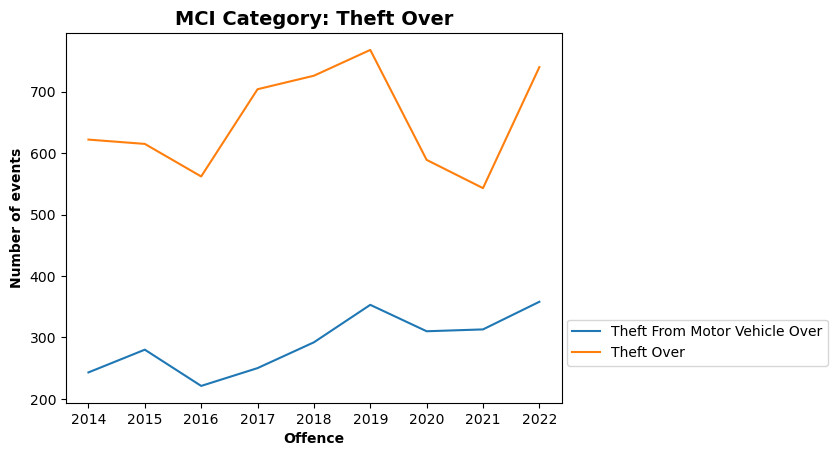

In [8]:
# Visualize
min_count = 100
# max_count = 100
max_count = max(year_offence_count['Number of events']) + 1
# one category for each plot
for mci_cat in mci_cats:
    this_data = year_offence_count.loc[year_offence_count['Category'] == mci_cat]

    # List of years
    offences = list(this_data['Offence'].unique())


    for offence in offences:
        this_offence_data = this_data.loc[this_data['Offence'] == offence]

        if any(this_offence_data['Number of events'] < min_count):
            continue
        elif any(this_offence_data['Number of events'] > max_count):
            continue
        else:
            # add this offence to plot
            plt.plot(
                this_offence_data['Year'],
                this_offence_data['Number of events'],
                label=offence,
                clip_on = False
            )
    plt.legend(loc=(1.01, 0.1))



    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.title(
        'MCI Category: ' + mci_cat,
        fontdict={'weight': 700, 'size': 14}
    )
    plt.xlabel('Offence', fontdict={'weight': 700})
    plt.ylabel('Number of events', fontdict={'weight': 700})

    plt.show()
    


## By premises type

In [9]:
year_premises_count = (df
    .groupby(['Year', 'Premises Type'], as_index=False)
    .size()
    .fillna(0)
    .rename(columns={'size': 'Number of events'})
)

year_premises_count

,Year,Premises Type,Number of events
0,2014,Apartment,7421
1,2014,Commercial,5452
2,2014,Educational,942
3,2014,House,6196
4,2014,Other,1554
...,...,...,...
58,2022,Educational,734
59,2022,House,6805
60,2022,Other,2398
61,2022,Outside,10273


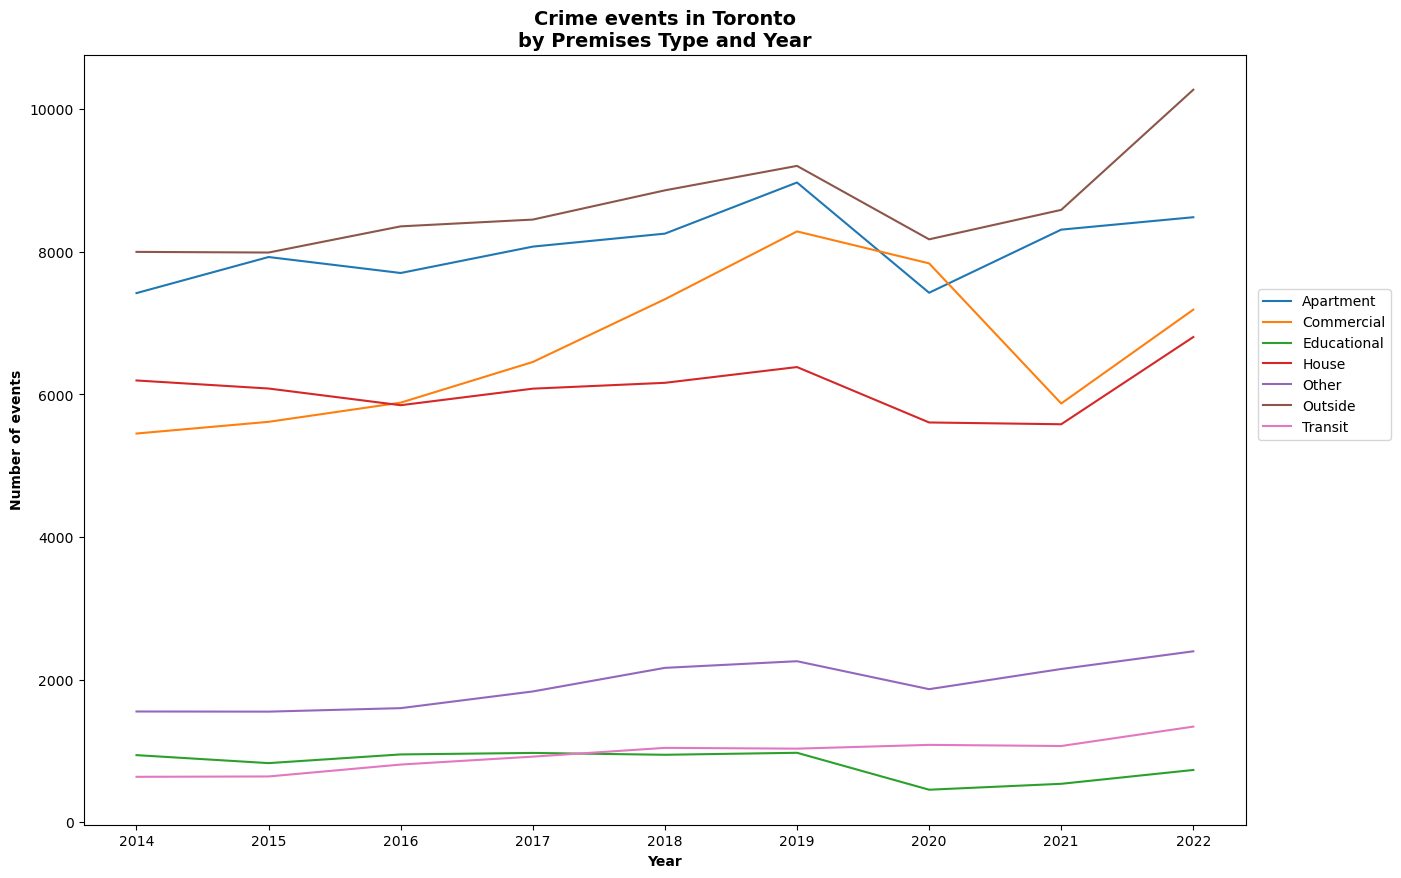

In [10]:
# Visualize
min_count = 0
max_count = max(year_premises_count['Number of events']) + 1
# max_count = 100


fig, ax = plt.subplots(figsize=(15, 10))


# List of premises types
premises = list(year_premises_count['Premises Type'].unique())

for prem in premises:
    this_data = year_premises_count.loc[year_premises_count['Premises Type'] == prem]

    if any(this_data['Number of events'] < min_count):
        continue
    elif any(this_data['Number of events'] > max_count):
        continue
    else:  # add this nhto plot
        ax.plot(
            this_data['Year'],
            this_data['Number of events'],
            label=prem,
            clip_on=False
        )

plt.xlabel('Year', fontdict={'weight': 700})
plt.ylabel('Number of events', fontdict={'weight': 700})
plt.title(
    'Crime events in Toronto\nby Premises Type and Year',
    fontdict={'weight': 700, 'size': 14}
)
plt.legend(loc=(1.01, 0.5))
# year_category_count.plot(
#     kind='bar',
#     stacked=False
# )
# plt.tight_layout()
plt.show()


## By location type

In [11]:
year_loc_count = (df
    .groupby(['Year', 'Premises Type', 'Location Type'], as_index=False)
    .size()
    .fillna(0)
    .rename(columns={'size': 'Number of events'})
)

year_loc_count

,Year,Premises Type,Location Type,Number of events
0,2014,Apartment,"Apartment (Rooming House, Condo)",7421
1,2014,Commercial,Bank And Other Financial Institutions (Money M...,191
2,2014,Commercial,Bar / Restaurant,1278
3,2014,Commercial,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",395
4,2014,Commercial,"Construction Site (Warehouse, Trailer, Shed)",193
...,...,...,...,...
437,2022,Transit,Ttc Street Car,71
438,2022,Transit,Ttc Subway Station,599
439,2022,Transit,Ttc Subway Train,175
440,2022,Transit,Ttc Subway Tunnel / Outdoor Tracks,4


In [12]:
# # Visualize
# min_count = 100
# max_count = max(year_loc_count['Number of events']) + 1
# # max_count = 1000


# fig, ax = plt.subplots(figsize=(15, 10))


# # List of loc types
# locations = list(year_loc_count['Location Type'].unique())

# for location in locations:
#     this_data = year_loc_count.loc[year_loc_count['Location Type'] == location]

#     if any(this_data['Number of events'] < min_count):
#         continue
#     elif any(this_data['Number of events'] > max_count):
#         continue
#     else:# add this nhto plot
#         ax.plot(
#             this_data['Year'],
#             this_data['Number of events'],
#             label=location
#         )

# plt.xlabel('Year', fontdict={'weight': 700})
# plt.ylabel('Number of events', fontdict={'weight': 700})
# plt.title(
#     'Crime events in Toronto\nby Location Type and Year',
#     fontdict={'weight': 700, 'size': 14}
#     )
# plt.legend(loc=(1.01, 0.5))
# # year_category_count.plot(
# #     kind='bar',
# #     stacked=False
# # )
# # plt.tight_layout()
# plt.show()


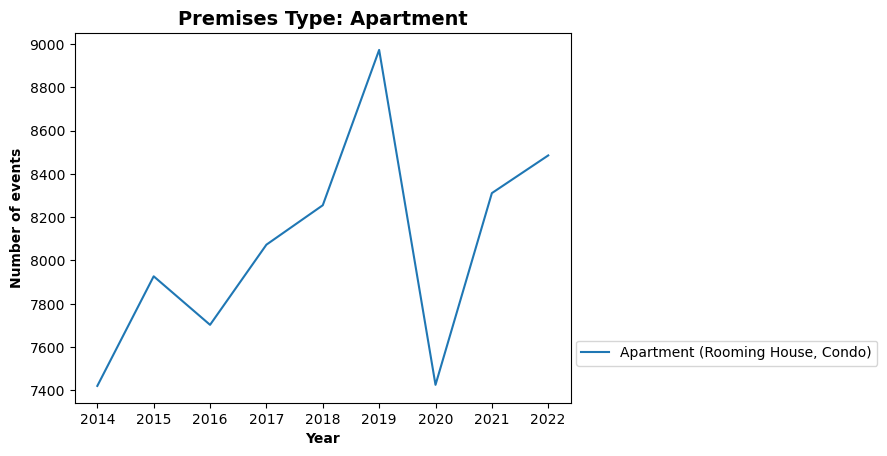

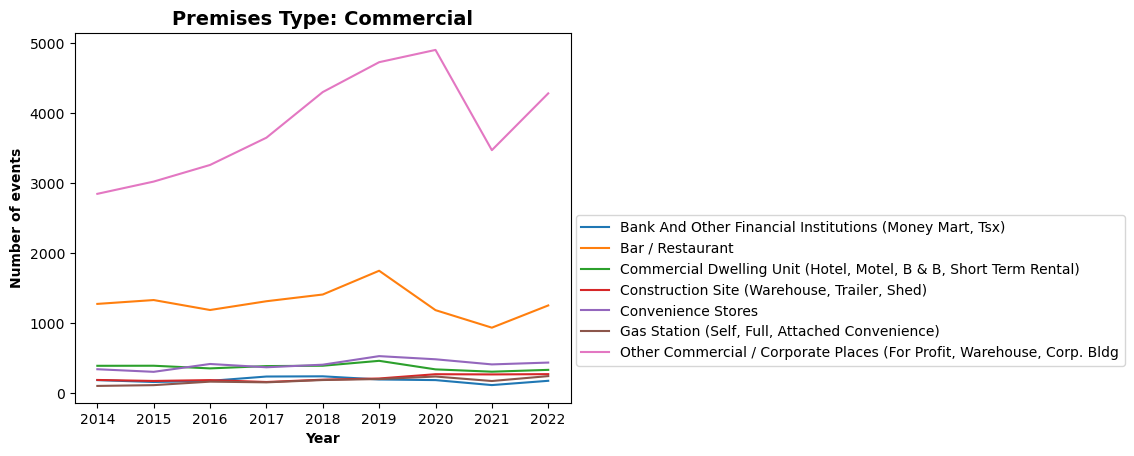

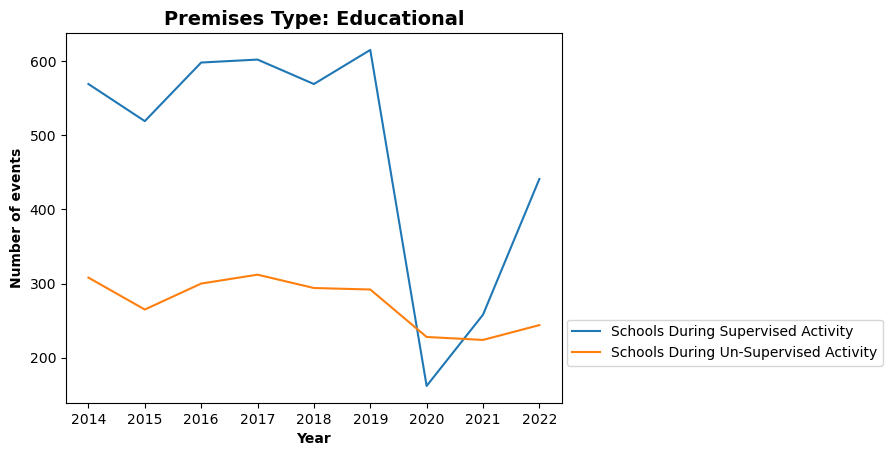

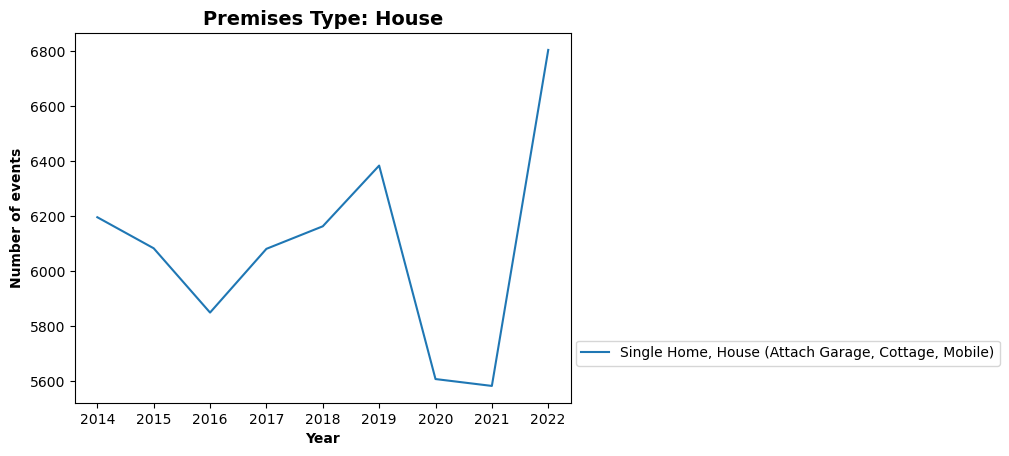

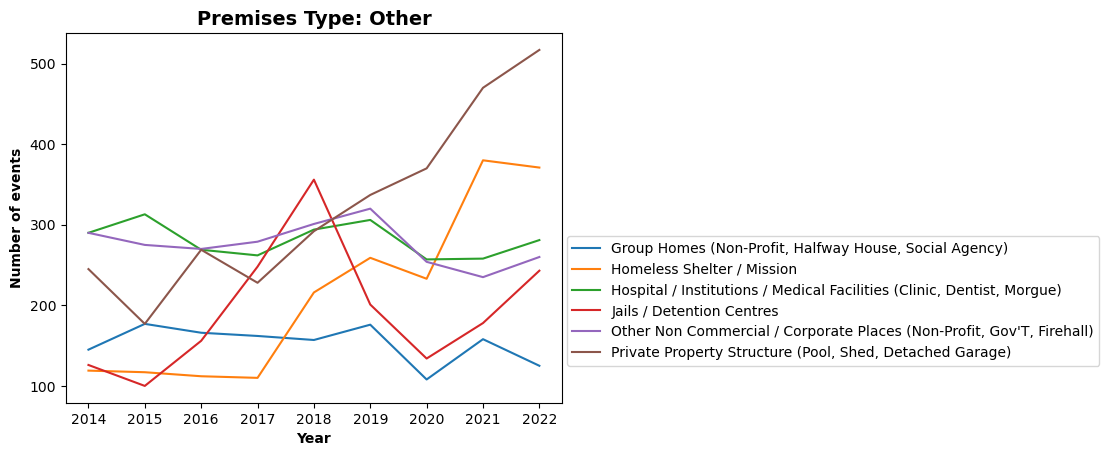

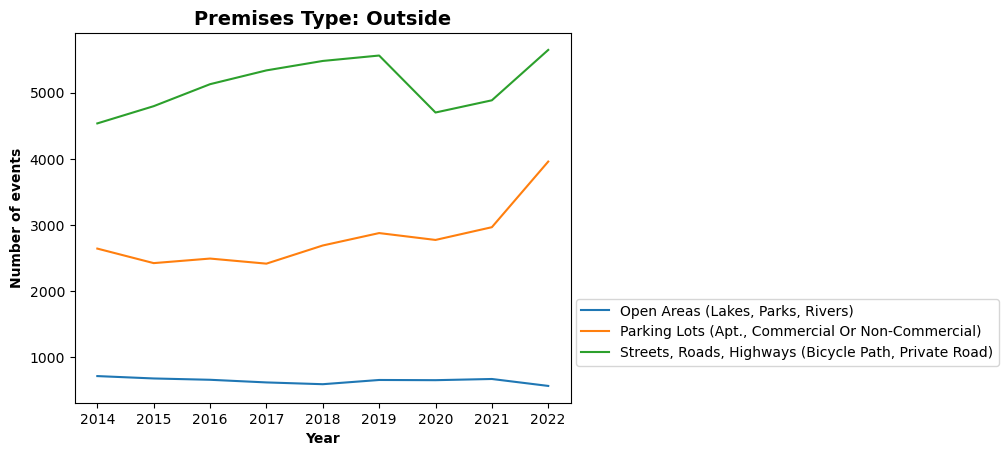

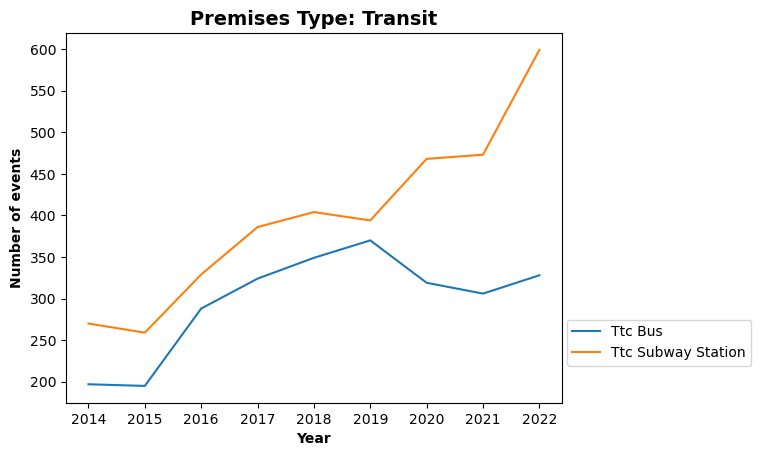

In [13]:
# Visualize
min_count = 100
max_count = max(year_loc_count['Number of events']) + 1
# max_count = 1000
premises = list(year_loc_count['Premises Type'].unique())
# one category for each plot
for prem in premises:
    this_data = year_loc_count.loc[year_loc_count['Premises Type'] == prem]

    locations = list(this_data['Location Type'].unique())

    for location in locations:
        this_loc_data = this_data.loc[this_data['Location Type'] == location]

        if any(this_loc_data['Number of events'] < min_count):
            continue
        elif any(this_loc_data['Number of events'] > max_count):
            continue
        else:
            # add this offence to plot
            plt.plot(
                this_loc_data['Year'],
                this_loc_data['Number of events'],
                label=location
            )
        # plt.plot(
        #     this_loc_data['Year'],
        #     this_loc_data['Number of events'],
        #     label=location
        # )
    # plt.ylim(
    #     max([100, min(this_data['Number of events'])-50]),
    #     max(this_data['Number of events']) + 50
    # )
    



    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.legend(loc=(1.01, 0.1))
    plt.title(
        'Premises Type: ' + prem,
        fontdict={'weight': 700, 'size': 14}
    )
    plt.xlabel('Year', fontdict={'weight': 700})
    plt.ylabel('Number of events', fontdict={'weight': 700})

    plt.show()
    


## By neighbourhood

In [14]:
# year_nh_count = (df
#     .groupby(['Year', 'Nh Name'], as_index=False)
#     .size()
#     .fillna(0)
#     .rename(columns={'size': 'Number of events'})
# )

# year_nh_count

In [15]:
# # Visualize
# min_count = 0
# # max_count = max(year_nh_count['Number of events']) + 1
# max_count = 100


# fig, ax = plt.subplots(figsize=(15, 10))


# # List ofcategories
# nhs = list(year_nh_count['Nh Name'].unique())

# for nh in nhs:
#     this_data = year_nh_count.loc[year_nh_count['Nh Name'] == nh]

#     if any(this_data['Number of events'] < min_count):
#         continue
#     elif any(this_data['Number of events'] > max_count):
#         continue
#     else:# add this nhto plot
#         ax.plot(
#             this_data['Year'],
#             this_data['Number of events'],
#             label=nh
#         )

# plt.xlabel('Year', fontdict={'weight': 700})
# plt.ylabel('Number of events', fontdict={'weight': 700})
# plt.title(
#     'Crime events in Toronto\nby Neighbourhood and Year',
#     fontdict={'weight': 700, 'size': 14}
#     )
# plt.legend(loc=(1.01, 0.5))
# # year_category_count.plot(
# #     kind='bar',
# #     stacked=False
# # )
# # plt.tight_layout()
# plt.show()


In [16]:
# # Visualize
# min_count = 500
# max_count = max(year_nh_count['Number of events']) + 1
# # max_count = 100


# fig, ax = plt.subplots(figsize=(15, 10))


# # List ofcategories
# nhs = list(year_nh_count['Nh Name'].unique())

# for nh in nhs:
#     this_data = year_nh_count.loc[year_nh_count['Nh Name'] == nh]

#     if any(this_data['Number of events'] < min_count):
#         continue
#     elif any(this_data['Number of events'] > max_count):
#         continue
#     else:# add this nhto plot
#         ax.plot(
#             this_data['Year'],
#             this_data['Number of events'],
#             label=nh
#         )

# plt.xlabel('Year', fontdict={'weight': 700})
# plt.ylabel('Number of events', fontdict={'weight': 700})
# plt.title(
#     'Crime events in Toronto\nby Neighbourhood and Year',
#     fontdict={'weight': 700, 'size': 14}
#     )
# plt.legend(loc=(1.01, 0.5))
# # year_category_count.plot(
# #     kind='bar',
# #     stacked=False
# # )
# # plt.tight_layout()
# plt.show()
